In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import sklearn
from sklearn.tree import plot_tree


In [2]:
print("numpy",np.__version__)
print("pandas",pd.__version__)
print("sklearn",sklearn.__version__)


numpy 2.1.2
pandas 2.2.3
sklearn 1.6.1


In [3]:
df=pd.read_csv('C:/Users/ASUS/OneDrive/Desktop/jupyter projects/Ml project/Crop_recommendation.csv')

In [4]:
df.head()

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice


In [5]:
df.isnull()

,N,P,K,temperature,humidity,ph,rainfall,label
0,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...
2195,False,False,False,False,False,False,False,False
2196,False,False,False,False,False,False,False,False
2197,False,False,False,False,False,False,False,False
2198,False,False,False,False,False,False,False,False


In [6]:
df.isnull().sum()

N              0
P              0
K              0
temperature    0
humidity       0
ph             0
rainfall       0
label          0
dtype: int64

In [7]:
df.duplicated().sum().item()

0

In [8]:
df.tail()

,N,P,K,temperature,humidity,ph,rainfall,label
2195,107,34,32,26.774637,66.413269,6.780064,177.774507,coffee
2196,99,15,27,27.417112,56.636362,6.086922,127.924610,coffee
2197,118,33,30,24.131797,67.225123,6.362608,173.322839,coffee
2198,117,32,34,26.272418,52.127394,6.758793,127.175293,coffee
2199,104,18,30,23.603016,60.396475,6.779833,140.937041,coffee


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   N            2200 non-null   int64  
 1   P            2200 non-null   int64  
 2   K            2200 non-null   int64  
 3   temperature  2200 non-null   float64
 4   humidity     2200 non-null   float64
 5   ph           2200 non-null   float64
 6   rainfall     2200 non-null   float64
 7   label        2200 non-null   object 
dtypes: float64(4), int64(3), object(1)
memory usage: 137.6+ KB


In [10]:
df.nunique()

N               137
P               117
K                73
temperature    2200
humidity       2200
ph             2200
rainfall       2200
label            22
dtype: int64

In [11]:
df['label'].unique()

array(['rice', 'maize', 'chickpea', 'kidneybeans', 'pigeonpeas',
       'mothbeans', 'mungbean', 'blackgram', 'lentil', 'pomegranate',
       'banana', 'mango', 'grapes', 'watermelon', 'muskmelon', 'apple',
       'orange', 'papaya', 'coconut', 'cotton', 'jute', 'coffee'],
      dtype=object)

In [12]:
df['label'].value_counts()

label
rice           100
maize          100
chickpea       100
kidneybeans    100
pigeonpeas     100
mothbeans      100
mungbean       100
blackgram      100
lentil         100
pomegranate    100
banana         100
mango          100
grapes         100
watermelon     100
muskmelon      100
apple          100
orange         100
papaya         100
coconut        100
cotton         100
jute           100
coffee         100
Name: count, dtype: int64

In [13]:
crop_summary=pd.pivot_table(df,index=['label'],aggfunc='mean')

In [14]:
crop_summary

,K,N,P,humidity,ph,rainfall,temperature
label,,,,,,,
apple,199.89,20.80,134.22,92.333383,5.929663,112.654779,22.630942
banana,50.05,100.23,82.01,80.358123,5.983893,104.626980,27.376798
blackgram,19.24,40.02,67.47,65.118426,7.133952,67.884151,29.973340
chickpea,79.92,40.09,67.79,16.860439,7.336957,80.058977,18.872847
coconut,30.59,21.98,16.93,94.844272,5.976562,175.686646,27.409892
coffee,29.94,101.20,28.74,58.869846,6.790308,158.066295,25.540477
cotton,19.56,117.77,46.24,79.843474,6.912675,80.398043,23.988958
grapes,200.11,23.18,132.53,81.875228,6.025937,69.611829,23.849575
jute,39.99,78.40,46.86,79.639864,6.732778,174.792798,24.958376


In [15]:
df.corr(numeric_only=True)


,N,P,K,temperature,humidity,ph,rainfall
N,1.000000,-0.231460,-0.140512,0.026504,0.190688,0.096683,0.059020
P,-0.231460,1.000000,0.736232,-0.127541,-0.118734,-0.138019,-0.063839
K,-0.140512,0.736232,1.000000,-0.160387,0.190859,-0.169503,-0.053461
temperature,0.026504,-0.127541,-0.160387,1.000000,0.205320,-0.017795,-0.030084
humidity,0.190688,-0.118734,0.190859,0.205320,1.000000,-0.008483,0.094423
ph,0.096683,-0.138019,-0.169503,-0.017795,-0.008483,1.000000,-0.109069
rainfall,0.059020,-0.063839,-0.053461,-0.030084,0.094423,-0.109069,1.000000


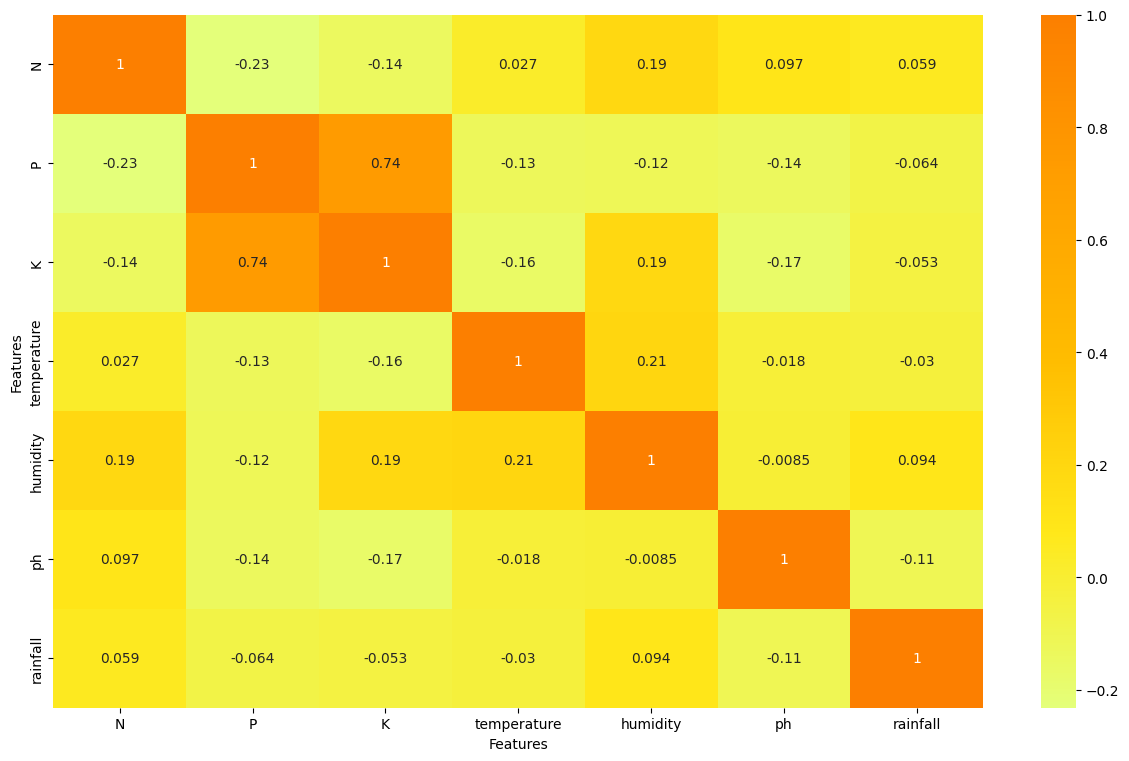

In [16]:

import seaborn as sns

fig, ax = plt.subplots(1, 1, figsize=(15, 9))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='Wistia')

ax.set(xlabel='Features', ylabel='Features')
plt.show()


In [17]:
x=df.drop('label',axis=1)
y=df['label']

In [18]:
x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   N            2200 non-null   int64  
 1   P            2200 non-null   int64  
 2   K            2200 non-null   int64  
 3   temperature  2200 non-null   float64
 4   humidity     2200 non-null   float64
 5   ph           2200 non-null   float64
 6   rainfall     2200 non-null   float64
dtypes: float64(4), int64(3)
memory usage: 120.4 KB


In [19]:
y.info()

<class 'pandas.core.series.Series'>
RangeIndex: 2200 entries, 0 to 2199
Series name: label
Non-Null Count  Dtype 
--------------  ----- 
2200 non-null   object
dtypes: object(1)
memory usage: 17.3+ KB


In [20]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,random_state=1,test_size=0.3)

In [21]:
x_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1540 entries, 625 to 1061
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   N            1540 non-null   int64  
 1   P            1540 non-null   int64  
 2   K            1540 non-null   int64  
 3   temperature  1540 non-null   float64
 4   humidity     1540 non-null   float64
 5   ph           1540 non-null   float64
 6   rainfall     1540 non-null   float64
dtypes: float64(4), int64(3)
memory usage: 96.2 KB


In [22]:
x_test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 660 entries, 1276 to 1132
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   N            660 non-null    int64  
 1   P            660 non-null    int64  
 2   K            660 non-null    int64  
 3   temperature  660 non-null    float64
 4   humidity     660 non-null    float64
 5   ph           660 non-null    float64
 6   rainfall     660 non-null    float64
dtypes: float64(4), int64(3)
memory usage: 41.2 KB


In [23]:
from sklearn.linear_model import LogisticRegression

In [24]:
model=LogisticRegression()
model.fit(x_train,y_train)

c:\Users\ASUS\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [25]:
y_pred=model.predict(x_test)

In [26]:
from sklearn.metrics import accuracy_score
logistic_reg_acc=accuracy_score(y_test,y_pred)
print("Logistic regression accuracy is "+str(logistic_reg_acc))

Logistic regression accuracy is 0.9651515151515152


In [27]:
from sklearn.tree import DecisionTreeClassifier
model1=DecisionTreeClassifier()
model1.fit(x_train,y_train)


DecisionTreeClassifier()

In [28]:
y_pred1=model1.predict(x_test)

In [29]:
decision_tree_acc=accuracy_score(y_test,y_pred1)
print("Decision tree accuracy is "+str(decision_tree_acc))

Decision tree accuracy is 0.9878787878787879


In [30]:
from sklearn.ensemble import RandomForestClassifier
model2=RandomForestClassifier()
model2.fit(x_train,y_train)

RandomForestClassifier()

In [31]:
y_pred2=model2.predict(x_test)

In [32]:
random_forest_acc=accuracy_score(y_test,y_pred2)
print("Random forest accuracy is "+str(random_forest_acc))

Random forest accuracy is 0.996969696969697


In [33]:
from sklearn.metrics import classification_report
from sklearn.tree import plot_tree


In [34]:
report = classification_report(y_test, y_pred2)

print("Classification Report:")
print(report)

Classification Report:
              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        31
      banana       1.00      1.00      1.00        28
   blackgram       1.00      1.00      1.00        29
    chickpea       1.00      1.00      1.00        28
     coconut       1.00      1.00      1.00        25
      coffee       1.00      1.00      1.00        28
      cotton       1.00      1.00      1.00        36
      grapes       1.00      1.00      1.00        44
        jute       0.94      1.00      0.97        32
 kidneybeans       1.00      1.00      1.00        33
      lentil       1.00      1.00      1.00        27
       maize       1.00      1.00      1.00        28
       mango       1.00      1.00      1.00        32
   mothbeans       1.00      1.00      1.00        33
    mungbean       1.00      1.00      1.00        33
   muskmelon       1.00      1.00      1.00        36
      orange       1.00      1.00      1.00        23
    

In [35]:
dtc = DecisionTreeClassifier(max_depth=3, random_state=0)  
dtc.fit(x, y)

DecisionTreeClassifier(max_depth=3, random_state=0)

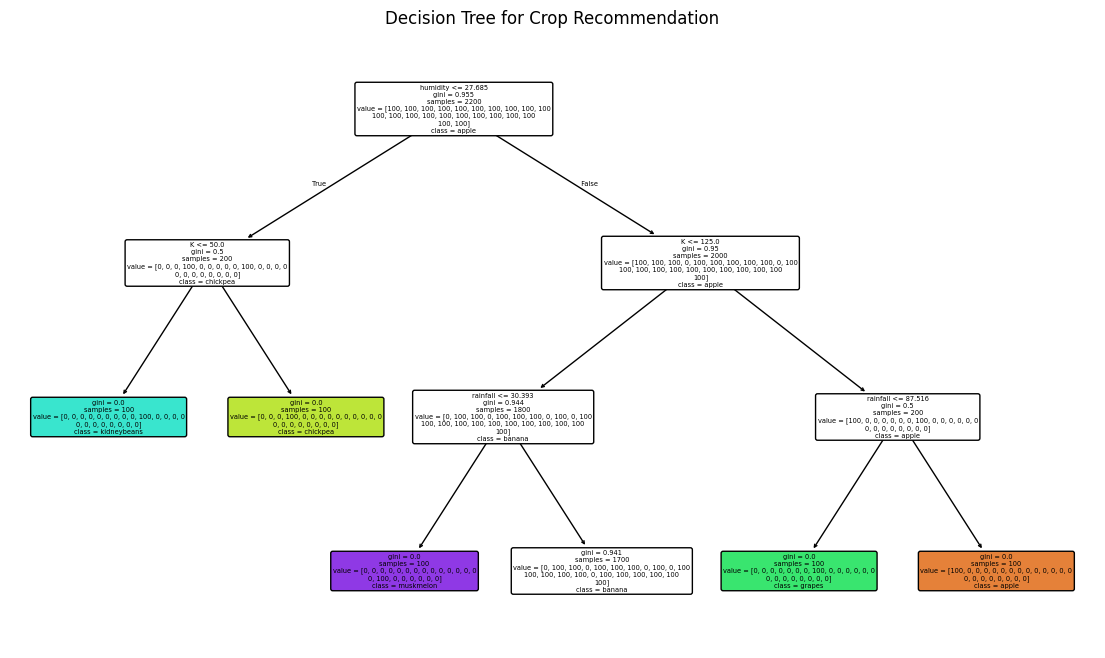

In [36]:
plt.figure(figsize=(14, 8))
plot_tree(dtc, filled=True, feature_names=x.columns, class_names=dtc.classes_, rounded=True)
plt.title("Decision Tree for Crop Recommendation")
plt.show()

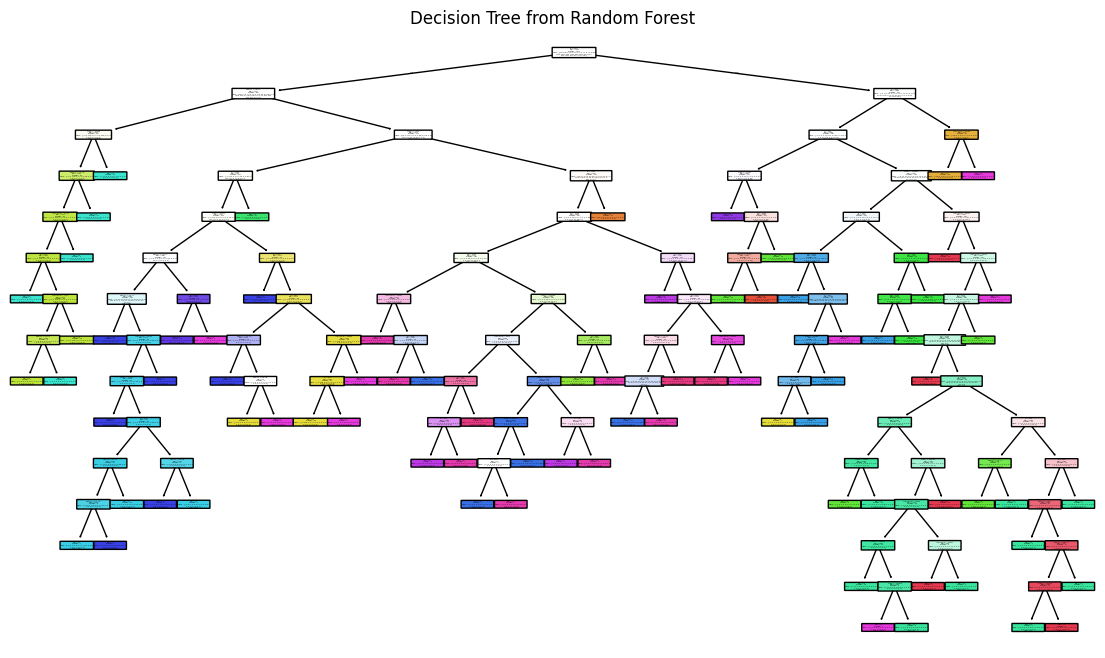

In [37]:
rf = RandomForestClassifier(n_estimators=100, random_state=0)
rf.fit(x, y)


plt.figure(figsize=(14, 8))
plot_tree(rf.estimators_[0], filled=True, feature_names=x.columns, class_names=rf.classes_, rounded=True)
plt.title("Decision Tree from Random Forest")
plt.show()

In [38]:
import joblib

In [39]:
filename='model.pkl'

In [40]:
joblib.dump(model2,'model.pkl')

['model.pkl']

In [41]:
app=joblib.load('model.pkl')

In [ ]:
arr=[[99,15,27,27.417112,56.636362,6.086922,127.924610	]]
ans=app.predict(arr)
ans.item()

c:\Users\ASUS\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


'coffee'

In [43]:
import pickle

with open('model.pkl','wb') as file:
    pickle.dump(model2,file)